## Import Library & Dataset

In [0]:
import numpy as np 
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [0]:
# Read File from Kaggle Dataset
data = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets/1067/1925/WA_Fn-UseC_-HR-Employee-Attrition.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586267281&Signature=ewjZqB6QlY82N1xdQbgFzolAWLNJsTyC%2FWOP3L3GbDHhKNihIEpSKLjLDxEDFW9WT9rn1sbQXDueRNzwyZoBKindetmrkk69lxQlCvoqY%2BXoXT0MuoSfj4SxtHkPGYdmDUszXp76vAcBetfoBy26Do%2BN1Amq9JFn%2F%2BpyShlDj79kiG48RlgOHJrIVGyRbABnEnty7Wrz8kYJSt5kx4JlBp8KEar99pNdrjb8dyd4fcp3wIL5XTJCl3NoG7WJTOUeFga9GZNraxrauLTpW23VeqmrDGI6aLwb745FRpWIDG%2BhcnbzAH85d9U5p7T6hW56lpwlc%2BG3wfMQLljUp4h9KA%3D%3D&response-content-disposition=attachment%3B+filename%3DWA_Fn-UseC_-HR-Employee-Attrition.csv')

#View data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From above info, there is no missing value in each feature. So, we don't have to handle missing value

In [0]:
# Count the number of instances each class
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We see that we have unbalanced data, with the number of instances belong to class "No" is much higher than class "Yes"



## Feature Engineering

In [0]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


We see that the feature StandadHours have same value both in class "Yes" and class "No". So, this feature will be removed since that feature have no correlation with output.

In [0]:
data = data.drop('StandardHours', axis=1)

### Encoding categorical feature & label with One Hot Encoding



In [0]:
#Store the categorical columns in a list categorical
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = data.columns.difference(categorical)

In [0]:
# Create categorical dataframe
data_cat = data[categorical].drop(['Attrition'], axis=1)

# Count the number of category each categorical feature
data_cat.nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

The most number of categories are in feature JobRole with 9 categories. If we sum all the unique category and we encode each category with one hot encoding, we will have 29 feature from categorical feature


In [0]:
# Encoding categorical feature with One Hot Encoding
data_cat = pd.get_dummies(data_cat)
data_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [0]:
# Encoding label to 1 and 0
target_map = {'Yes':1, 'No':0}
target = data["Attrition"].apply(lambda x: target_map[x])
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [0]:
# Create numerical dataframe
data_num = data[numerical]

#Concatenate numerical dataframe & categorical dataframe
data_final = pd.concat([data_num, data_cat], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

### Data Normalization

We will normalize data by substract data by its mean and divide by its standard deviation

In [0]:
data_norm = (data_final - data_final.mean()) / data_final.std()
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EmployeeCount                      1470 non-null   float64
 5   EmployeeNumber                     1470 non-null   float64
 6   EnvironmentSatisfaction            1470 non-null   float64
 7   HourlyRate                         1470 non-null   float64
 8   JobInvolvement                     1470 non-null   float64
 9   JobLevel                           1470 non-null   float64
 10  JobSatisfaction                    1470 non-null   float64
 11  MonthlyIncome                      1470 non-null   float

### Handling unbalanced data

We will use oversampling method to handle unbalanced data

In [0]:
oversampler=SMOTE(random_state=0)
smote_train, smote_train_target = oversampler.fit_sample(data_norm,target)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



## Algorithm

In [0]:
#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(smote_train,
                                                    smote_train_target,
                                                    stratify=smote_train_target,
                                                    test_size=0.3,
                                                    random_state=0)

### Define training model

We create neural network model with 2 hidden layers. The first hidden layer has 20 nodes, and the second hidden layer has 12 nodes. Each layer also has regularization function. We use relu activation function for each hidden layer and sigmoid activation function for output layer.


In [0]:
def create_model(my_learning_rate, my_metrics):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Hidden1'))
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))

  model.add(tf.keras.layers.Dropout(rate=0.2))
  
  # Define the output nodes. 
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)    
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

### Define the plotting function.

In [0]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


### Training the data

Epoch 1/200

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

7/7 [==============================] - 0s 48ms/step - loss: 0.7644 - accuracy: 0.4978 - precision: 0.5053 - recall: 0.3424 - val_loss: 0.6627 - val_accuracy: 0.5896 - val_precision: 0.5935 - val_recall: 0.4424
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.7033 - accuracy: 0.5580 - precision: 0.5721 - recall: 0.5000 - val_loss: 0.6400 - val_accuracy: 0.6272 - val_precision: 0.6216 - val_recall: 0.5576
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - 

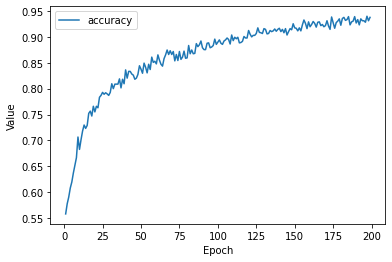

In [0]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 200
batch_size = 200
validation_split = 0.2
classification_threshold = 0.5
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

### Testing the data

In [0]:
my_model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9000 - precision: 0.8776 - recall: 0.9297


[0.26421746611595154,
 0.8999999761581421,
 0.8775510191917419,
 0.929729700088501]